# Assignment 3 - part 1
Lauri Pessi | bft860

## Dataset: Yahoo finance: ETH-USD, BTC-USD

In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader.data as web

plt.style.use('seaborn-whitegrid')

In [2]:
# Ingest data and output summary

btc = web.DataReader('BTC-USD', start = '2015-1-1', data_source = 'yahoo')
eth = web.DataReader('ETH-USD', start = '2015-1-1', data_source = 'yahoo')

def printShape(data):
    return('Rows: ' + str(data.shape[0]) + ', Columns: ' + str(data.shape[1]) + '\n')

print('BTC dataset \n' + printShape(btc))
print('ETH dataset \n' + printShape(eth))

BTC dataset 
Rows: 2619, Columns: 6

ETH dataset 
Rows: 1576, Columns: 6



## Initial assumptions
Yes, I know cryptos are silly and consume huge amount of energy while providing hardly any actual value.
But for the sake of exercise, these should have a lot of movement to dig into.

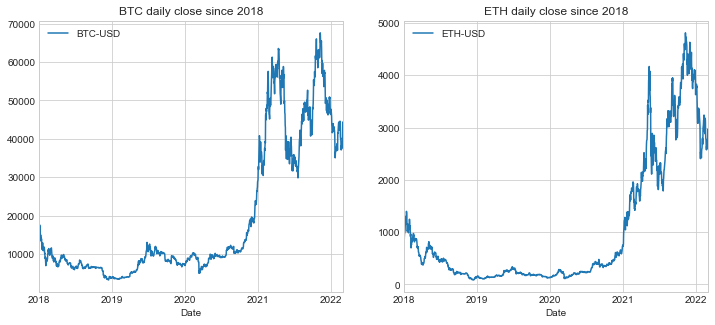

In [3]:
# Make some space for side-by-side plots
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
btc['Close']['2018':].plot(label='BTC-USD')
plt.title('BTC daily close since 2018')
plt.legend()

plt.subplot(1,2,2)
eth['Close']['2018':].plot(label='ETH-USD')
plt.title('ETH daily close since 2018')
plt.legend();


Surprisingly the (yahoos) recorded history of ETH started from end of 2017, while the internet tells that it was launched mid-2015.
This made me to filter both datasets starting from 2018 in order to see the possible similarities in their valuation history.

And yes, there's a quite a bit common in the general trends even though the prices themselves have a 10x difference in their levels.
Visually there's some signs that huge upwards trend started with BTC a bit earlier than ETH. Maybe using lagged correlations could reveal if that's really the case. 

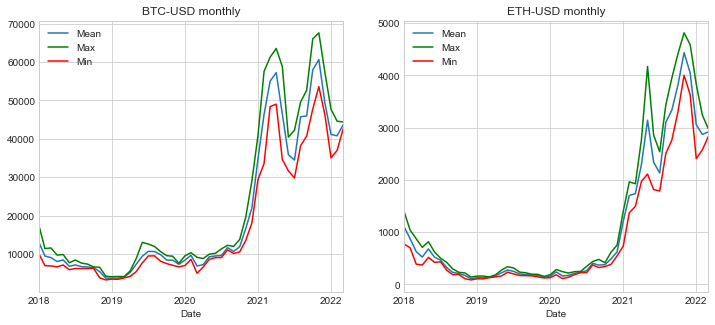

In [4]:
# Similar side-by-side view aggregated to monthly, with min, max and average closing prices
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
btc['Close']['2018':].resample('M').mean().plot(label='Mean')
btc['Close']['2018':].resample('M').max().plot(c='green', label='Max')
btc['Close']['2018':].resample('M').min().plot(c='red', label='Min')
plt.title('BTC-USD monthly')
plt.legend()

plt.subplot(1,2,2)
eth['Close']['2018':].resample('M').mean().plot(label='Mean')
eth['Close']['2018':].resample('M').max().plot(c='green', label='Max')
eth['Close']['2018':].resample('M').min().plot(c='red', label='Min')
plt.title('ETH-USD monthly')
plt.legend();

## Insigths from historical values
As expected, the values have fluctuated a lot and on monthly averages you can see huge differences between min and max closing prices.
There's also been a very steep increase in the valuation of both since mid-2020, which makes these figures rather difficult to read.



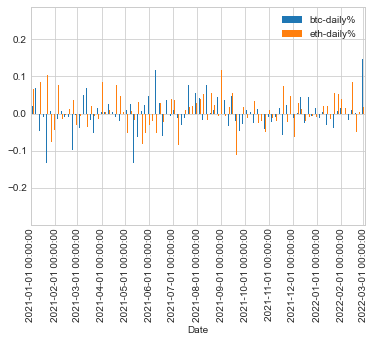

In [5]:
# Daily differences
btc['btc-daily%'] = btc['Close'].pct_change()
eth['eth-daily%'] = eth['Close'].pct_change()

changes = pd.concat([btc['btc-daily%'], eth['eth-daily%']], axis = 1)

changes['2021':].plot.bar()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

In [6]:
# Correlation of change% by year since 2018
changes['2018':].groupby(changes['2018':].index.year).corr()


btc-daily%  eth-daily%
Date                                   
2018 btc-daily%    1.000000    0.813229
     eth-daily%    0.813229    1.000000
2019 btc-daily%    1.000000    0.820858
     eth-daily%    0.820858    1.000000
2020 btc-daily%    1.000000    0.838777
     eth-daily%    0.838777    1.000000
2021 btc-daily%    1.000000    0.761213
     eth-daily%    0.761213    1.000000
2022 btc-daily%    1.000000    0.896204
     eth-daily%    0.896204    1.000000

## Conclusions
As with the visual inspection of close values, positive correlation between the two series can also be found the daily change percentages.

### Extra
As the close values of these two series showed some sign of ETH tracking the BTC values with slight delay, let's test if this is actually the case

The lags with highest correlation are:


array([21, 22, 20, 23, 24])

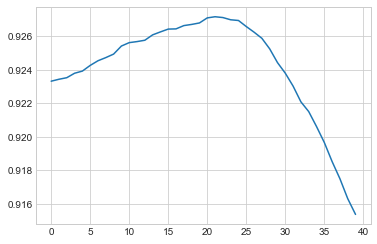

In [7]:
# Calculate cross-correlations between the two series with different lags

import statsmodels.api as sm, numpy as np
lags = sm.tsa.stattools.ccf(eth['Close']['2018':], btc['Close']['2018':], adjusted=False)

# Plot the correlation-coefficents up to ~1,5 months lag and print the exact values of top-5
plt.plot(lags[0:40])

print('The lags with highest correlation are:')
np.flip(np.argsort(lags))[0:5]


In [8]:
# And another matrix of correlation coefficents using also the ETH with lag of 21 days
changesLagged = pd.concat([btc['Close'], eth['Close'], eth['Close'].shift(-21)], axis = 1, keys=['BTC', 'ETH', 'ETH Lagged'])

changesLagged['2018':].corr()

,BTC,ETH,ETH Lagged
BTC,1.000000,0.923321,0.936894
ETH,0.923321,1.000000,0.963114
ETH Lagged,0.936894,0.963114,1.000000


## Final thoughts

I did try the cross-correlation of the change% between two series, but here the non-lagged was the best fit.
Also when calculating the correlation of close values grouped by year, the non-lagged performed better.

So to put it short, while I did learn some python functions, I didn't find how to get rich with crypto-trading.



